<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo3/blob/main/notebooks/Comparacao_Projecoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de avalição comparativa de projeções
O objetivo deste projeto será comparar algumas projeções feitas em níveis distintos e avaliar qual delas possui uma melhor aderência com os dados futuros do último mês da base (novembro de 2021).

Teremos algumas avaliações, sendo que a ideia principal passa por comparar duas formas distintas de projetar os dados de óbitos por covid no total do Brasil:
* partindo dos dados do Brasil como um todo;
* partindo dos dados por Região do Brasil;

Algumas funções e o tratamento inicial dos dados foram feitos em um outro notebook, caso queiram entender melhor acessem [Funcoes_Dados.ipynb](https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo3/blob/main/notebooks/Funcoes_Dados.ipynb). Lembrando que as informações originais foram retiradas do [Brasil.io](https://brasil.io/dataset/covid19/caso_full/) e mantive informações até a data do dia 30 de novembro de 2021.


## Carregando notebook de funções e dados

In [1]:
!git clone "https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo3" #clona o github para utilizarmos os arquivos

Cloning into 'BootcampAlura_ProjetoModulo3'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 63 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [2]:
%run '/content/BootcampAlura_ProjetoModulo3/notebooks/Funcoes_Dados.ipynb' #roda o arquivo com as funções e os dados

   holiday         ds
0  sp_2020 2020-02-25
1  sp_2020 2020-02-26
2  sp_2020 2020-04-10
3  sp_2020 2020-02-25
4  sp_2020 2020-02-26
    holiday         ds
15  sp_2021 2021-09-07
16  sp_2021 2021-10-12
17  sp_2021 2021-11-02
18  sp_2021 2021-11-15
19  sp_2021 2021-12-25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23267 entries, 0 to 23266
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   city                                           6307 non-null   object        
 1   city_ibge_code                                 23267 non-null  float64       
 2   date                                           23267 non-null  datetime64[ns]
 3   epidemiological_week                           23267 non-null  int64         
 4   estimated_population                           23267 non-null  float64       
 5   estimated_population_2019          

## Projetando pela informação diária

### dados consolidados do Brasil

#### definição de tamanho e criação das bases de treino e de teste

In [3]:
tamanho = dados_Brasil.shape[0]
inicia_teste = tamanho-30

In [4]:
df_treino, df_teste = cria_DFs(dados_Brasil, 'new_deaths', inicia_teste)

#### buscando o modelo mais aderente

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


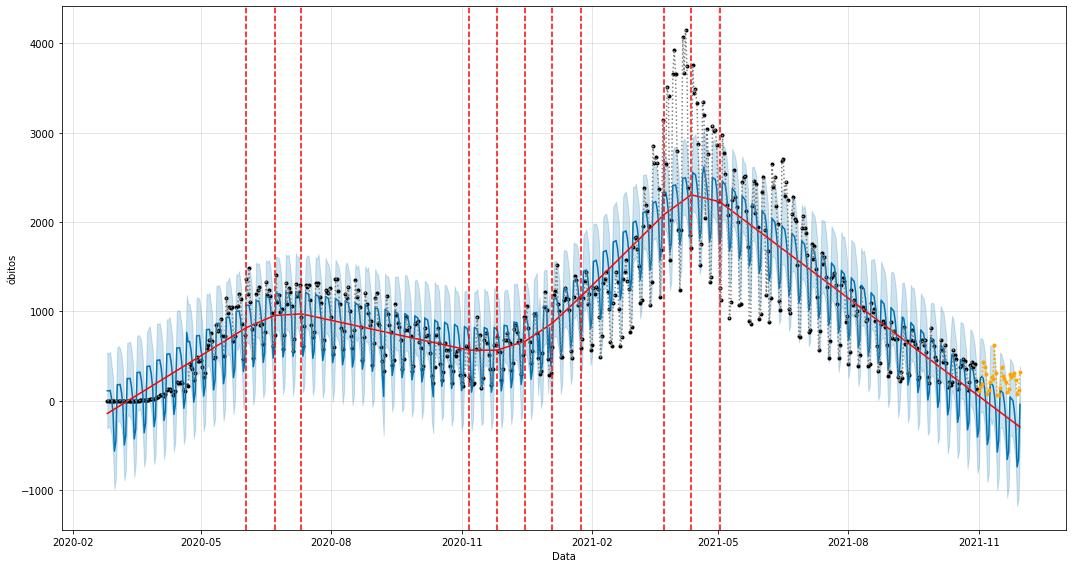

In [5]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


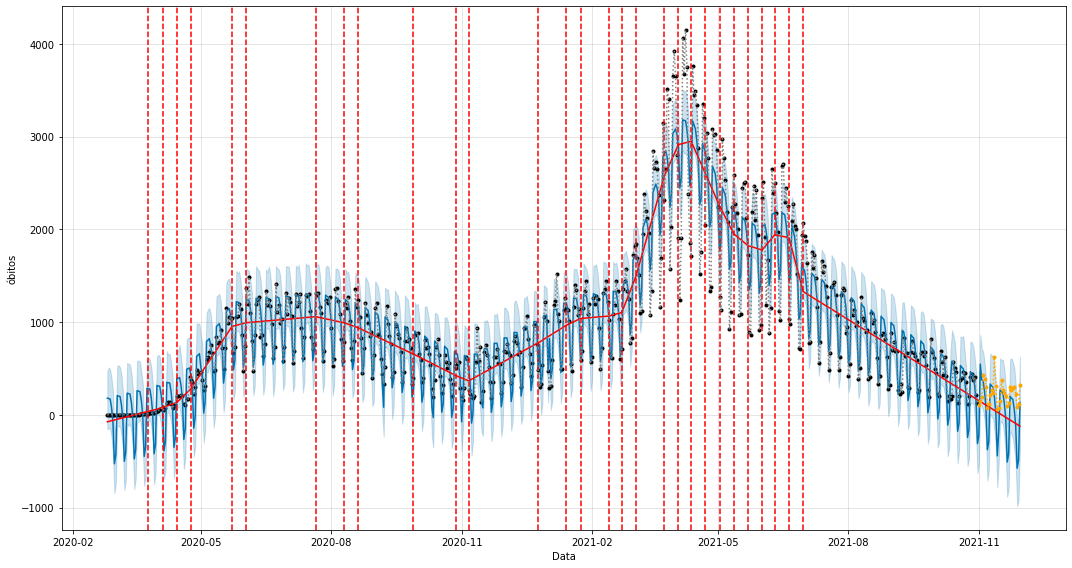

In [6]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoint_prior_scale=5, n_changepoints=50)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


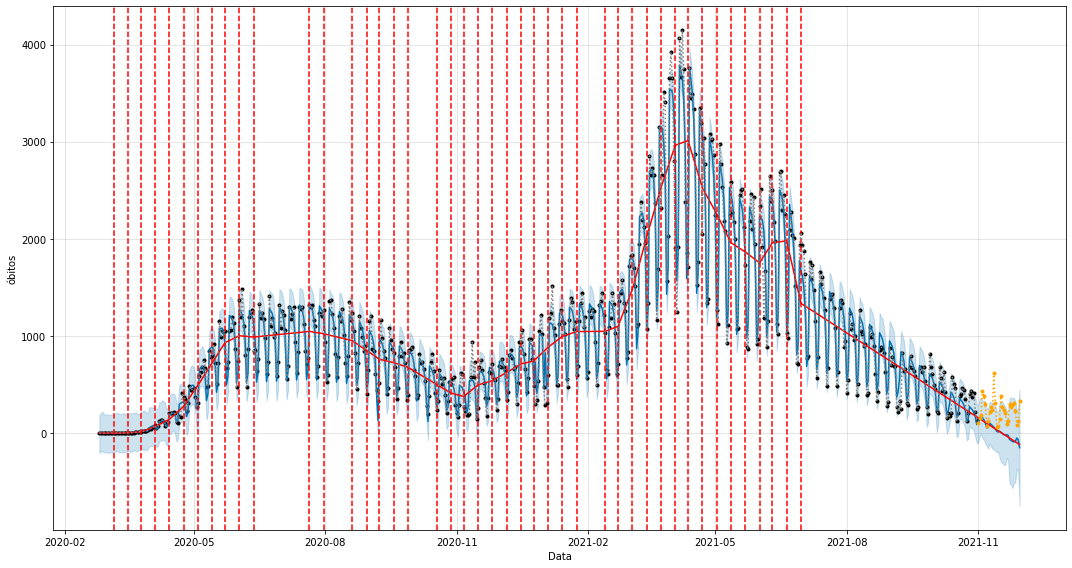

In [7]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoint_prior_scale=5, n_changepoints=50, seasonality_mode='multiplicative')

#### O modelo mais aderente foi quando eu defini os changepoints

#### Porém restou uma dúvida, é melhor incluir ou não a sazonalidade anual?

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


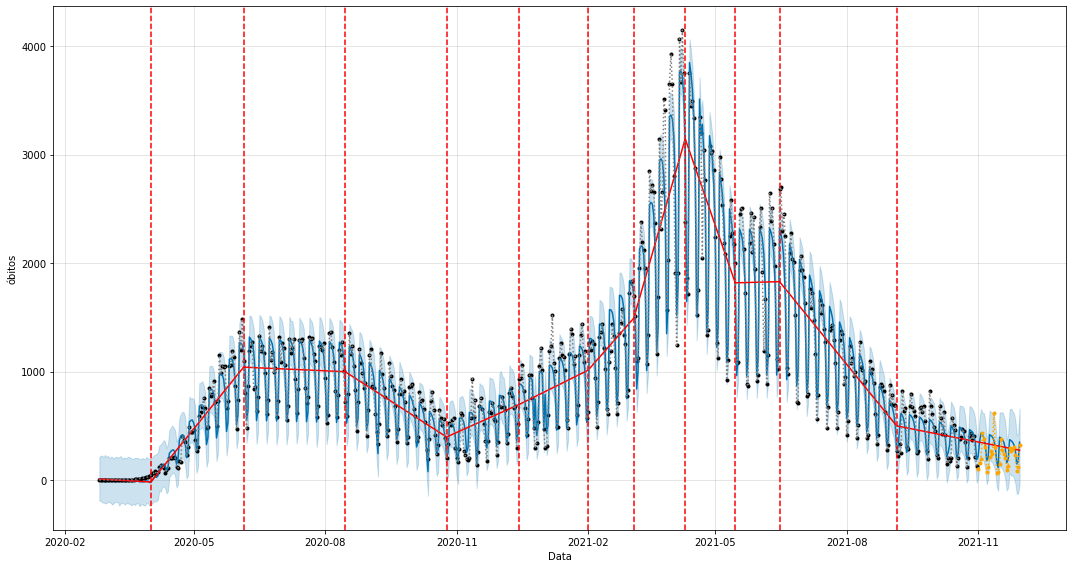

In [8]:
# opção 1: sem sazonalidade anual
lista_changepoints = ['2020-04-01','2020-06-05','2020-08-15','2020-10-25','2020-12-15','2021-02-01',
                      '2021-03-05','2021-04-10','2021-05-15','2021-06-15','2021-09-05']
modelo_Brasil_01, previsao_Brasil_01 = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoints=lista_changepoints, changepoint_prior_scale=5, seasonality_mode='multiplicative')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


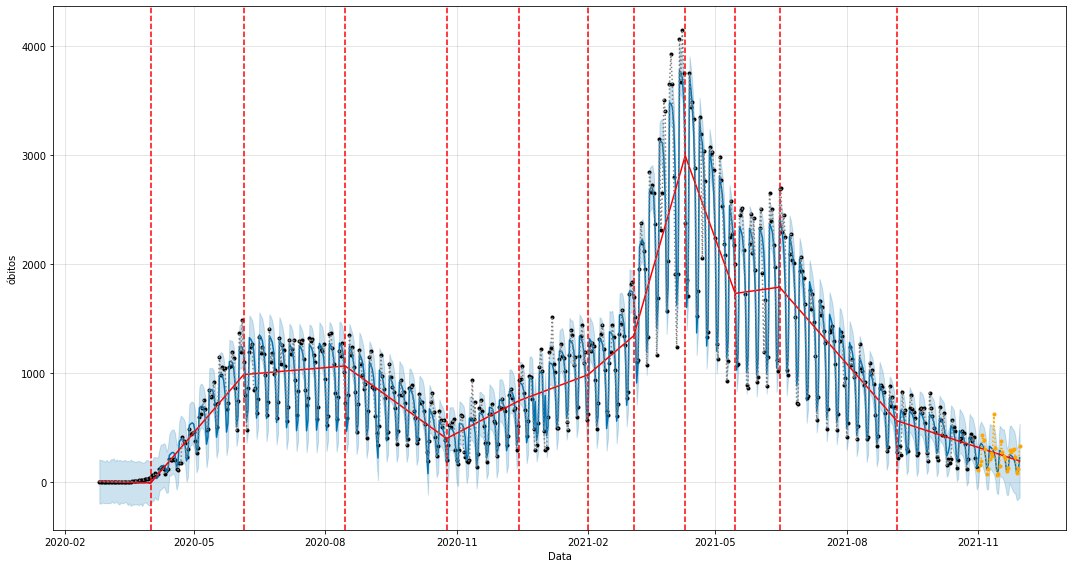

In [9]:
# opção 2: com sazonalidade anual
lista_changepoints = ['2020-04-01','2020-06-05','2020-08-15','2020-10-25','2020-12-15','2021-02-01',
                      '2021-03-05','2021-04-10','2021-05-15','2021-06-15','2021-09-05']
modelo_Brasil_02, previsao_Brasil_02 = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoints=lista_changepoints, changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                         yearly_seasonality=True)

In [10]:
print ("Comparando os modelos com a base teste")
metricas(df_teste, previsao_Brasil_01[inicia_teste:],"Modelo 1")
metricas(df_teste, previsao_Brasil_02[inicia_teste:],"Modelo 2")

Comparando os modelos com a base teste

Modelo 1
Mean Absolute Error: 93.96
Root Mean Squared Error: 14,133.08
Mean Absolute Percentage Error: 0.58

Modelo 2
Mean Absolute Error: 70.09
Root Mean Squared Error: 9,647.73
Mean Absolute Percentage Error: 0.33


#### Análise Brasil
O modelo de projeção do total do Brasil mais aderente foi quando criei uma lista de change points por observação do gráfico e também inclui a sazonalidade anual.

Este modelo conseguiu ter um erro médio percentual absoluto de 33%. E graficamente conseguimos ver que todos os pontos estão dentro da margem de erro do modelo, com exceção de um ponto atípico.

### partindo dos dados por região

#### definição de tamanho e criação das bases de treino e de teste

In [11]:
regioes = dados_regioes['regiao'].unique()
bases_regiao = {}
inicio_teste = {}
df_treino_regiao = {}
df_teste_regiao = {}
for regiao in regioes:
  bases_regiao[regiao] = dados_regioes.query('regiao == @regiao')
  inicio_teste[regiao] = bases_regiao[regiao].shape[0]-30
  df_treino_regiao[regiao], df_teste_regiao[regiao] = cria_DFs(bases_regiao[regiao],'new_deaths',inicio_teste[regiao])
modelo_regiao = {}
previsao_regiao = {}

#### Modelo Região 0: Centro-Oeste

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Centro-Oeste


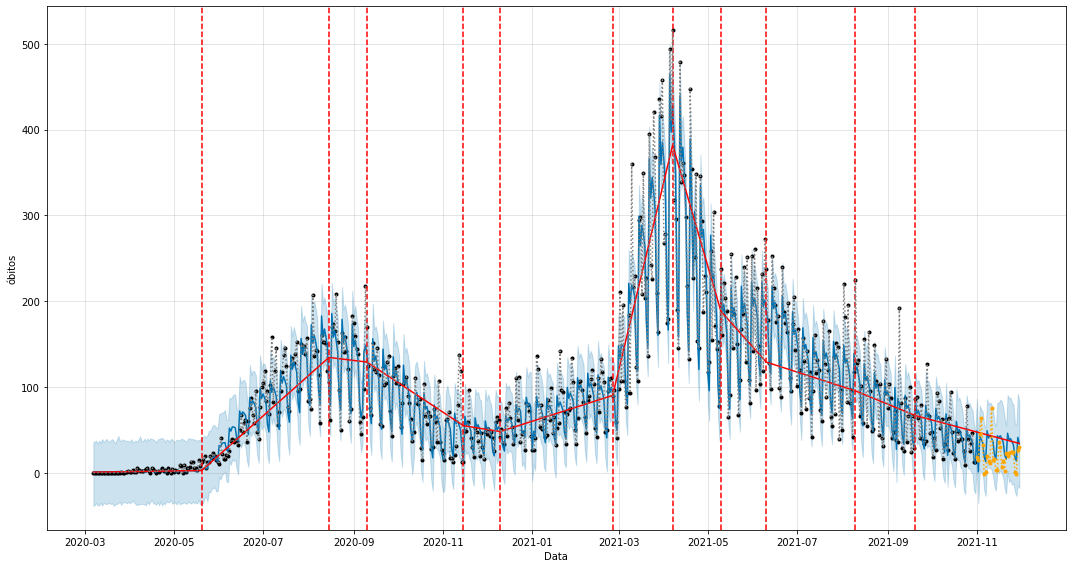

In [182]:
r = 0 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-05-20','2020-08-15','2020-09-10','2020-11-15','2020-12-10',
                      '2021-02-25','2021-04-07','2021-05-10','2021-06-10','2021-08-10','2021-09-20']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

In [183]:
metricas(df_teste_regiao[regioes[r]], previsao_regiao[regioes[r]][inicio_teste[regioes[r]]:],'Avaliação das métricas da região ' + regioes[r])


Avaliação das métricas da região Centro-Oeste
Mean Absolute Error: 17.93
Root Mean Squared Error: 426.14
Mean Absolute Percentage Error: 3.79


#### Modelo Região 1: Nordeste

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Nordeste


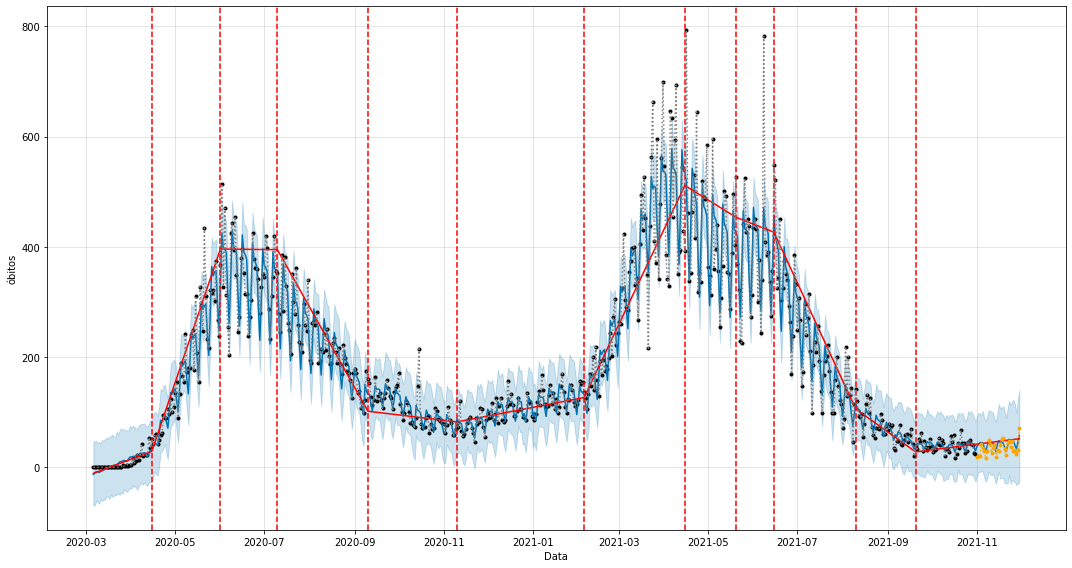

In [159]:
r = 1 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-15','2020-06-01','2020-07-10','2020-09-10','2020-09-30','2020-11-10',
                      '2021-02-05','2021-04-15','2021-05-20','2021-06-15','2021-08-10','2021-09-20']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

In [160]:
metricas(df_teste_regiao[regioes[r]], previsao_regiao[regioes[r]][inicio_teste[regioes[r]]:],'Avaliação das métricas da região ' + regioes[r])


Avaliação das métricas da região Nordeste
Mean Absolute Error: 9.95
Root Mean Squared Error: 139.28
Mean Absolute Percentage Error: 0.37


#### Modelo Região 2: Norte

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Norte


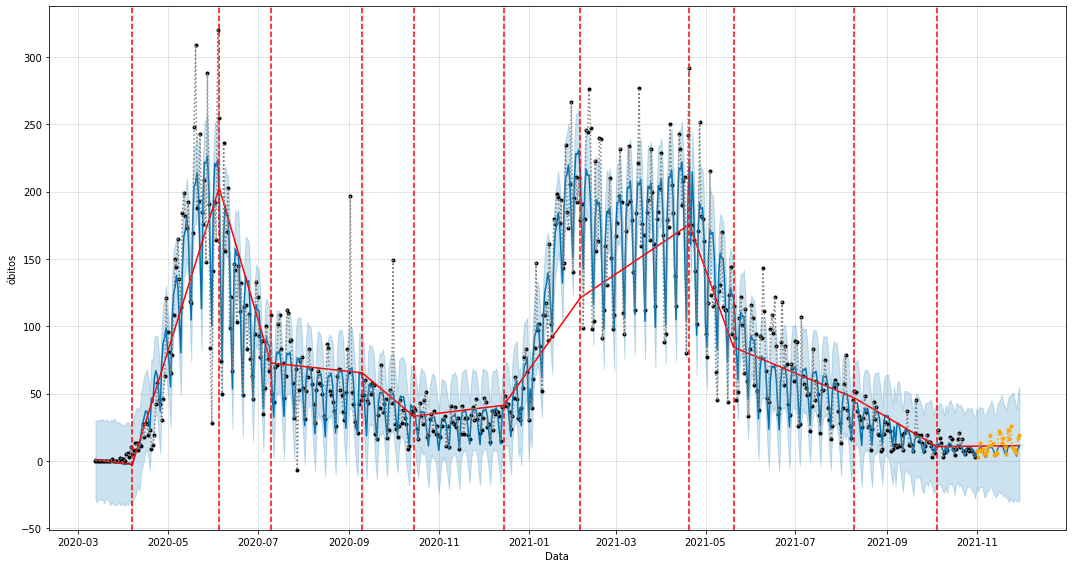

In [33]:
r = 2 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-07','2020-06-05','2020-07-10','2020-09-10','2020-10-15','2020-12-15',
                      '2021-02-05','2021-04-20','2021-05-20','2021-08-10','2021-10-05']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

In [34]:
metricas(df_teste_regiao[regioes[r]], previsao_regiao[regioes[r]][inicio_teste[regioes[r]]:],'Avaliação das métricas da região ' + regioes[r])


Avaliação das métricas da região Norte
Mean Absolute Error: 4.31
Root Mean Squared Error: 34.88
Mean Absolute Percentage Error: 0.35


#### Modelo Região 3: Sudeste

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Sudeste


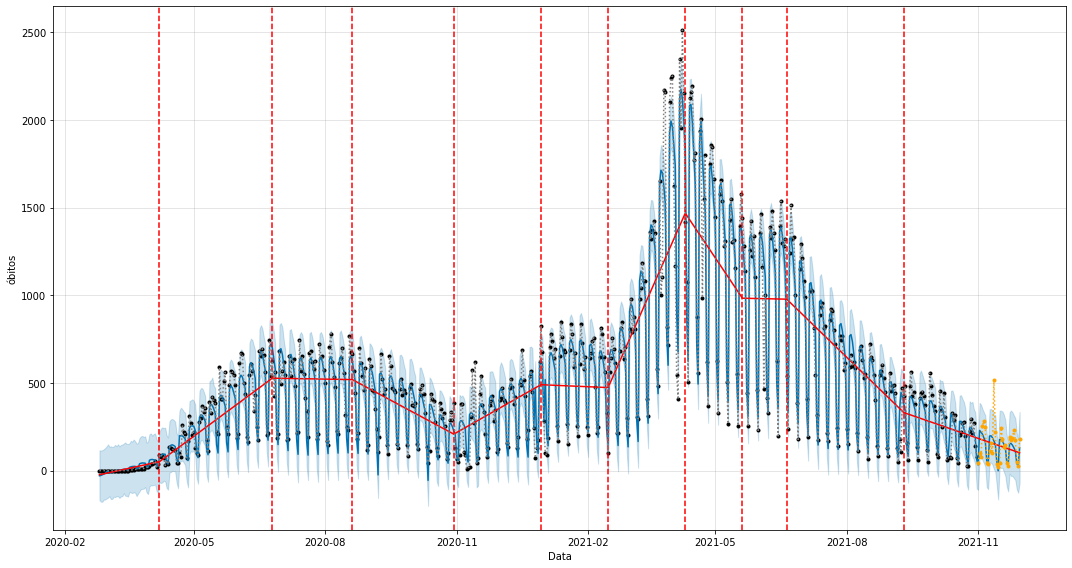

In [153]:
r = 3 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-07','2020-06-25','2020-08-20','2020-10-30','2020-12-30',
                      '2021-02-15','2021-04-10','2021-05-20','2021-06-20','2021-09-10']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

In [154]:
metricas(df_teste_regiao[regioes[r]], previsao_regiao[regioes[r]][inicio_teste[regioes[r]]:],'Avaliação das métricas da região ' + regioes[r])


Avaliação das métricas da região Sudeste
Mean Absolute Error: 59.39
Root Mean Squared Error: 8,088.51
Mean Absolute Percentage Error: 0.51


#### Modelo Região 4: Sul

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Sul


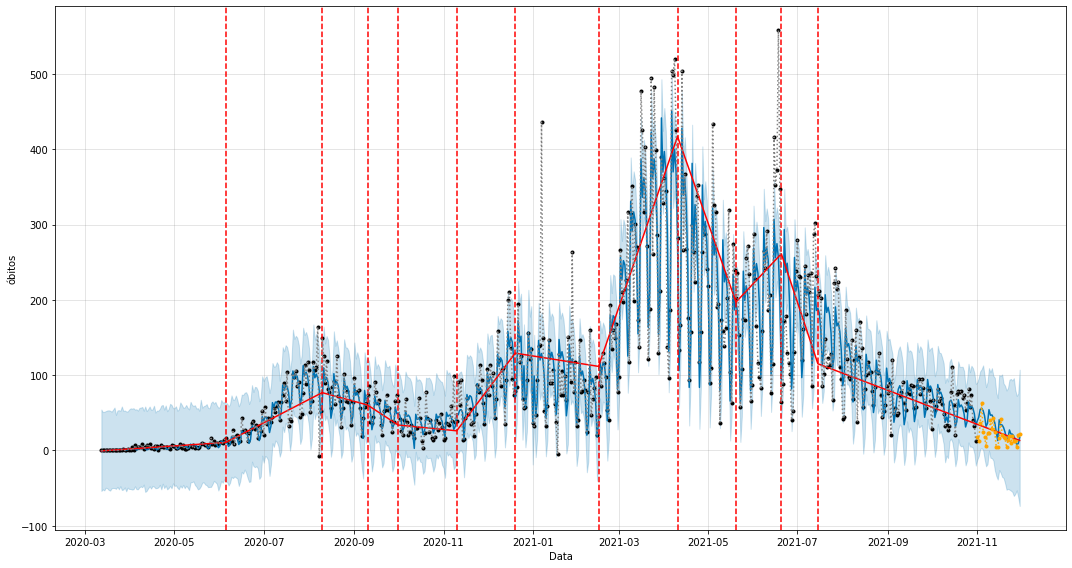

In [98]:
r = 4 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-06-05','2020-08-10','2020-09-10','2020-10-01','2020-11-10','2020-12-20',
                      '2021-02-15','2021-04-10','2021-05-20','2021-06-20','2021-07-15']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

In [99]:
metricas(df_teste_regiao[regioes[r]], previsao_regiao[regioes[r]][inicio_teste[regioes[r]]:],'Avaliação das métricas da região ' + regioes[r])


Avaliação das métricas da região Sul
Mean Absolute Error: 13.36
Root Mean Squared Error: 260.26
Mean Absolute Percentage Error: 1.05


#### Análise Regiões

Criar o modelo por região foi mas dificil do que o do total do Brasil, tivemos apenas 2 regiões com um erro mais próximo do que conseguimos no total do Brasil, que foram as regiões Norte e Nordeste. Vale lembrar que a única métrica de erro que podemos utilizar para comporar os modelos de regiões diferentes é a MAPE (Mean Absolute Percentage Error) por ser um indicador relativo.

Caberia uma análise posterior para entender os motivos, uma das hipóteses seria que as regiões onde temos maior dificuldade pode ser devido a comportamentos muito distintos entre seus integrantes.

### Comparando a soma das regiões contra a base teste do total do Brasil

In [187]:
previsao_regioes = previsao_regiao[regioes[0]][inicio_teste[regioes[0]]:].copy()
for regaio in regioes[1:]:
  previsao_regioes = pd.concat((previsao_regioes, previsao_regiao[regiao][inicio_teste[regiao]:]), ignore_index=True)
previsao_regioes = previsao_regioes[['ds','yhat','yhat_lower','yhat_upper']].groupby(by='ds').sum().reset_index()

In [189]:
metricas(df_teste, previsao_regioes,'Somatoria das previsões por Região contra os dados reais do Brasil')
metricas(df_teste, previsao_Brasil_02[inicia_teste:],"Resultado do melhor modelo dos dados do Brasil como um todo")


Somatoria das previsões por Região contra os dados reais do Brasil
Mean Absolute Error: 104.50
Root Mean Squared Error: 17,684.91
Mean Absolute Percentage Error: 0.46

Resultado do melhor modelo dos dados do Brasil como um todo
Mean Absolute Error: 70.09
Root Mean Squared Error: 9,647.73
Mean Absolute Percentage Error: 0.33


#### Conclusão

Como podemos ver acima, a dificuldade que tivemos para calibrar os modelos por região trouxe um erro maior para a somatória das projeções do que quando fizemos a projeção do Brasil como um todo, sem quebra.

Eu tinha uma expectativa que se conseguíssemos fazer boas projeções num nível mais analítico, isso iria gerar uma precisão maior na projeção total. Porém, o resultado acima ficou dentro da expectativa, dado que na visão de cada região não foi possível criar um modelo muito aderente, algumas regiões mesmo após a calibragem continuaram com erros muito relevantes.

Um próximo passo seria entender os motivos das diferenças tão relevantes no modelo por região. Será que se fizéssemos por estado melhoraria? Essa pergunta ficará para uma próxima análise.
